## Import Dependencies

In [1]:
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple, Dict, Callable

## Import Data

In [2]:
df = pd.read_csv('./fish.csv', sep=',', header=0)
df.head()

,Weight,Length,Width
0,67,9.3,1.0476
1,75,10.0,1.1600
2,70,10.1,1.1484
3,72,10.1,1.1821
4,79,10.2,1.2560


## EDA

<AxesSubplot:xlabel='Length', ylabel='Weight'>

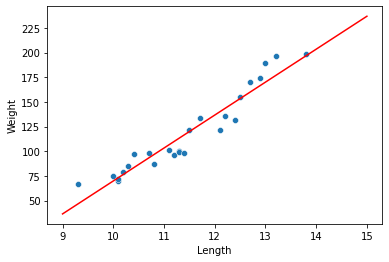

In [3]:
ax = sns.scatterplot(data=df, x='Length', y='Weight')
sns.lineplot(x=np.linspace(9, 15), y=33.40157 * np.linspace(9, 15) -264.19890, color='r', ax=ax)

In [4]:
def univariate_gradient_descent_b(
    f: Callable, f_: Callable, b_start: float,
    alpha: float = 0.01, epsilon: float = 0.0001,
    max_iter: int = 100
):
    global df
    b = b_start
    X = df['Length']
    Y = df['Weight']
    difference = epsilon + 1
    e = f(df, b)

    print(f'Iteration 0; b={b:.2f}; e={e:.2f}')

    for i in range(1, max_iter + 1):
        b_next = b - alpha * f_(df, b)
        e_next = f(df, b_next)
        difference = abs(e_next - e)
        if difference < epsilon:
            break
        b = b_next
        e = e_next
    
    print(f'Iteration {i}; b={b:.5f}; e={e:.5f}')

In [5]:
def E(df: pd.DataFrame, b: float, a: float = 0.0):
    y_true = df['Weight']
    y_hat = b * df['Length'] + a
    err = y_true - y_hat
    return (err ** 2).mean()

E(df, 12)

1127.5520000000001

In [6]:
def E_b(df:pd.DataFrame, b: float, a: float = 0.0):
    y_true = df['Weight']
    y_hat = b * df['Length'] + a
    err = y_true - y_hat
    return -2 * (err * df['Length']).mean()

E_b(df, 30, -220)

111.31999999999998

In [7]:
univariate_gradient_descent_b(f = E, f_ = E_b, b_start = 8, alpha=0.005, max_iter=100)

Iteration 0; b=8.00; e=1715.87
Iteration 9; b=10.55518; e=851.30939


## Part 2

In [30]:
def univariate_gradient_descent(
    f: Callable, f_b: Callable, f_a: Callable,
    b_start: float, a_start: float,
    alpha: float = 0.001, epsilon: float = 0.0001,
    max_iter: int = 100
):
    global df
    b = b_start
    a = a_start
    difference = epsilon + 1
    e = f(df, b, a)

    print(f'Iteration 0; b={b:10.2f}; a={a:10.2f}; e={e:10.2f}')

    for i in range(1, max_iter + 1):
        b_next = b - alpha * f_b(df, b, a)
        a_next = a - alpha * f_a(df, b, a)
        e_next = f(df, b_next, a_next)
        difference = abs(e_next - e)
        if difference < epsilon:
            print(f'Iteration {i}; b={b:10.5f}; a={a:10.5f}; e={e:10.5f}')
        b = b_next
        a = a_next
        e = e_next
        if difference < epsilon:
            break
    
    print(f'Iteration {i}; b={b:10.5f}; a={a:10.5f}; e={e:10.5f}')
    

In [9]:
def E_a(df: pd.DataFrame, b: float, a: float = 0.0):
    y_true = df['Weight']
    y_hat = b * df['Length'] + a
    err = y_true - y_hat
    return -2 * err.mean()

E_a(df, 10.55545, 2)

9.357583200000011

In [29]:
univariate_gradient_descent(E, E_b, E_a, 0, 0, alpha=0.007, epsilon=0.0001, max_iter=30000)

Iteration 0; b=      0.00; a=      0.00; e=  15601.76
Iteration 27211; b=  33.07871; a=-260.46549; e= 137.83782
Iteration 27211; b=  33.07871; a=-260.46549; e= 137.83782


## Part 3

In [31]:
def E2(df: pd.DataFrame, a: float, b: float, c: float):
    y_true = df['Weight']
    y_hat = a + b * df['Length'] + c * df['Width']
    err = y_true - y_hat
    return (err ** 2).mean()

E2(df, -264, 33, -0.6)

167.19251554851212

In [32]:
def E2_a(df: pd.DataFrame, a: float, b: float, c: float):
    y_true = df['Weight']
    y_hat = a + b * df['Length'] + c * df['Width']
    err = y_true - y_hat
    return -2 * err.mean()

E2_a(df, 10.55545, 2, 0)

-169.4171

In [33]:
def E2_b(df:pd.DataFrame, a: float, b: float, c: float):
    y_true = df['Weight']
    y_hat = a + b * df['Length'] + c * df['Width']
    err = y_true - y_hat
    return -2 * (err * df['Length']).mean()

E2_b(df, 30, -220, 0)

-60358.68

In [34]:
def E2_c(df:pd.DataFrame, a: float, b: float, c: float):
    y_true = df['Weight']
    y_hat = a + b * df['Length'] + c * df['Width']
    err = y_true - y_hat
    return -2 * (err * df['Width']).mean()

E2_c(df, 30, -220, 0)

-7449.4511680000005

In [35]:
def bivariate_gradient_descent(
    f: Callable, f_a: Callable, f_b: Callable, f_c: Callable,
    a_start: float, b_start: float, c_start: float,
    alpha: float = 0.001, epsilon: float = 0.0001,
    max_iter: int = 100
):
    global df
    a = a_start
    b = b_start
    c = c_start

    difference = epsilon + 1
    e = f(df, a, b, c)

    print(f'i=0; a={a:10.2f}; b={b:10.2f}; c={c:10.5f}; e={e:10.2f}')

    for i in range(1, max_iter + 1):
        a_next = a - alpha * f_a(df, a, b, c)
        b_next = b - alpha * f_b(df, a, b, c)
        c_next = c - alpha * f_c(df, a, b, c)
        e_next = f(df, a_next, b_next, c_next)
        difference = abs(e_next - e)
        if difference < epsilon:
            break
        a = a_next
        b = b_next
        c = c_next
        e = e_next
    
    print(f'i={i}; a={a:10.5f}; b={b:10.5f}; c={c:10.5f}; e={e:10.5f}')
    

In [38]:
bivariate_gradient_descent(E2, E2_a, E2_b, E2_c, a_start=0, b_start=0, c_start=0, alpha=0.007, epsilon=0.001, max_iter=40000)

i=0; a=      0.00; b=      0.00; c=   0.00000; e=  15601.76
i=19753; a=-182.97329; b=  17.74585; c=  70.01875; e=  51.91297


<AxesSubplot:xlabel='Length', ylabel='Weight'>

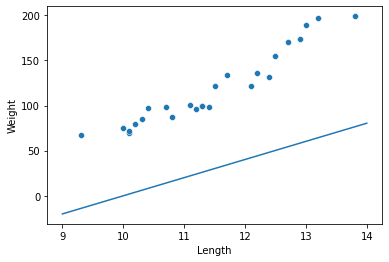

In [40]:
sns.scatterplot(data=df, x='Length', y='Weight')
sns.lineplot(x=np.linspace(9, 14), y=20.11287 * np.linspace(9, 14) -201.17285)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_frame=df, x='Length', y='Width', z='Weight')
fig.add_trace(px.line_3d(x=np.linspace(10, 13), y=np.linspace(1, 2), z=-201.17285 + 20.11287 * np.linspace(10, 13) + 63.58511 * np.linspace(1, 2)).update_traces(line={'color': 'red'}).data[0])
fig